<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19482 entries, 0 to 19481
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19482 non-null  int64  
 1   name                            19482 non-null  object 
 2   host_id                         19482 non-null  int64  
 3   host_name                       19480 non-null  object 
 4   neighbourhood_group             19482 non-null  object 
 5   neighbourhood                   19482 non-null  object 
 6   latitude                        19482 non-null  float64
 7   longitude                       19482 non-null  float64
 8   room_type                       19482 non-null  object 
 9   price                           15422 non-null  float64
 10  minimum_nights                  19482 non-null  int64  
 11  number_of_reviews               19482 non-null  int64  
 12  last_review                     

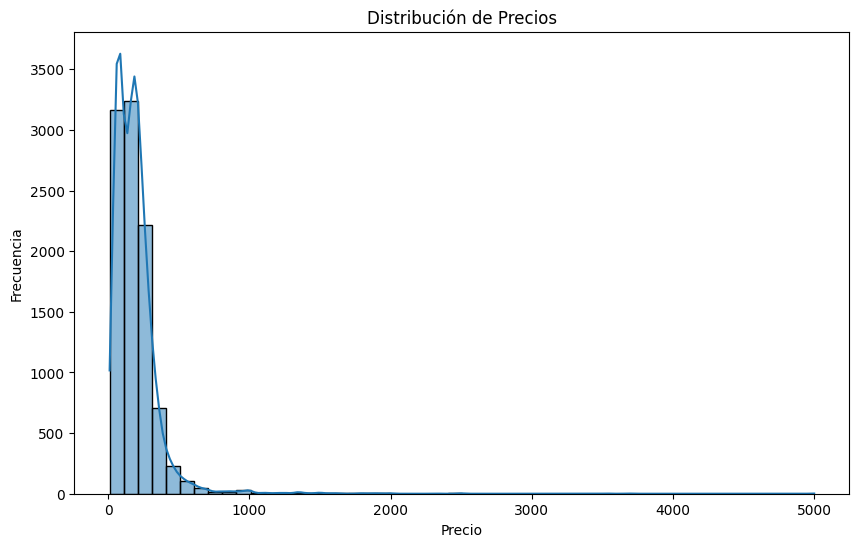

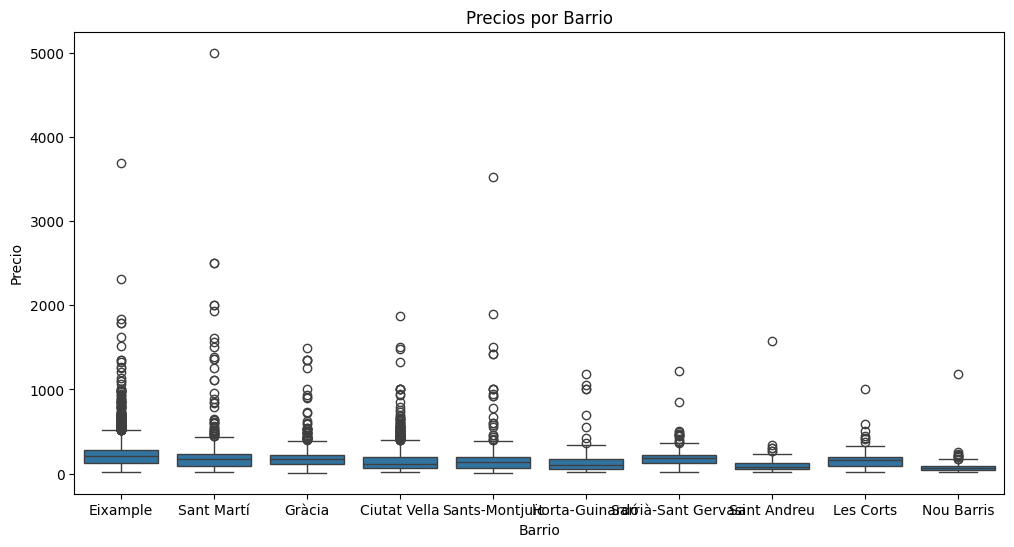

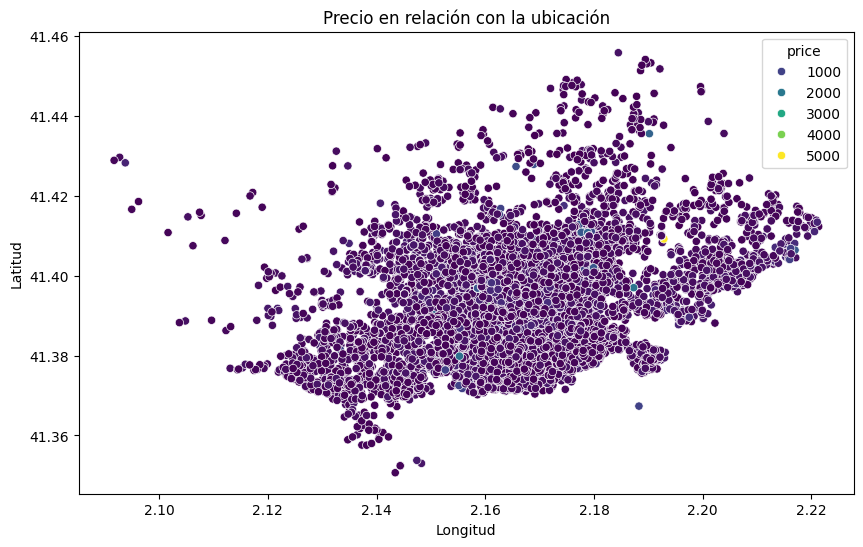

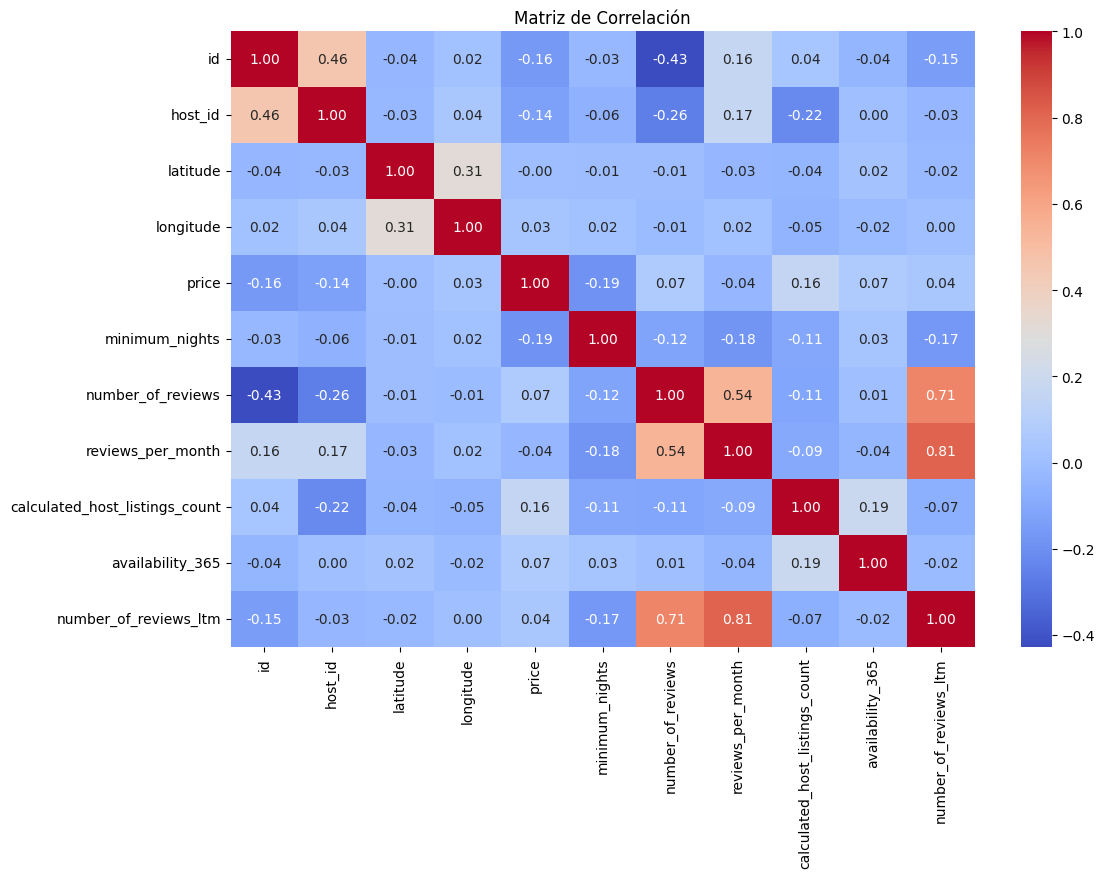

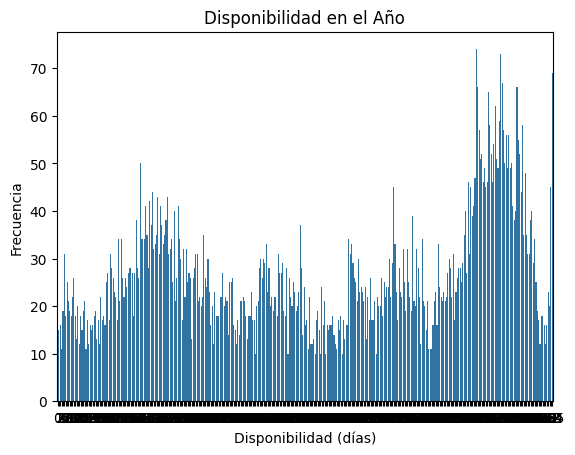

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_BarcelonaSept24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsB06Sep24.csv')

# 1. Vista general del dataset
print(df_BarcelonaSept24.info())
print(df_BarcelonaSept24.describe())
print(df_BarcelonaSept24.head())

# Eliminar los nulos de las columnas
df_BarcelonaSept24 = df_BarcelonaSept24.dropna()


# 2. Verificar valores nulos
print(df_BarcelonaSept24.isnull().sum())

# 3. Limpiar y convertir la columna 'price' a numérica (puede tener símbolos no numéricos)
# Eliminar símbolos como "$" y comas en la columna 'price'
df_BarcelonaSept24['price'] = df_BarcelonaSept24['price'].replace({'\\$': '', ',': ''}, regex=True)

# Convertir la columna 'price' a tipo numérico, con 'coerce' para manejar los errores y convertir a NaN cuando no se pueda
df_BarcelonaSept24['price'] = pd.to_numeric(df_BarcelonaSept24['price'], errors='coerce')

# Verifica que la conversión sea exitosa
print(df_BarcelonaSept24['price'].describe())

# 4. Filtrar solo las columnas numéricas para análisis
df_numerico = df_BarcelonaSept24.select_dtypes(include=[np.number])

# Verificar que las columnas numéricas son las correctas
print(df_numerico.columns)

# 5. Estadísticas generales para la columna 'price'
print(df_numerico['price'].describe())  # Estadísticas para precios, por ejemplo

# 6. Distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df_numerico['price'], bins=50, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# 7. Análisis de precios por barrio
# Verificar si 'neighbourhood_group' es una columna numérica o categórica
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df_BarcelonaSept24)
plt.title('Precios por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio')
plt.show()

# 8. Relación entre características y el precio
# Asegúrate de que 'longitude' y 'latitude' son numéricas antes de hacer el gráfico
df_BarcelonaSept24['longitude'] = pd.to_numeric(df_BarcelonaSept24['longitude'], errors='coerce')
df_BarcelonaSept24['latitude'] = pd.to_numeric(df_BarcelonaSept24['latitude'], errors='coerce')

# Solo usar columnas numéricas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='price', data=df_BarcelonaSept24, palette='viridis')
plt.title('Precio en relación con la ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

# 9. Correlación entre variables numéricas
correlation_matrix = df_numerico.corr()  # Utilizar solo columnas numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# 10. Análisis de la disponibilidad
sns.countplot(x='availability_365', data=df_BarcelonaSept24)
plt.title('Disponibilidad en el Año')
plt.xlabel('Disponibilidad (días)')
plt.ylabel('Frecuencia')
plt.show()


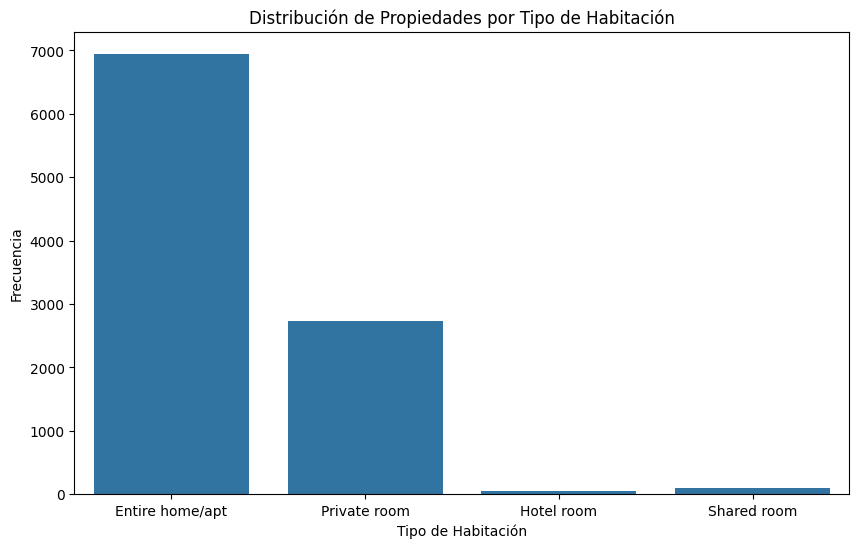

In [15]:
# Distribución de las propiedades por tipo de habitación
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df_BarcelonaSept24)
plt.title('Distribución de Propiedades por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Frecuencia')
plt.show()


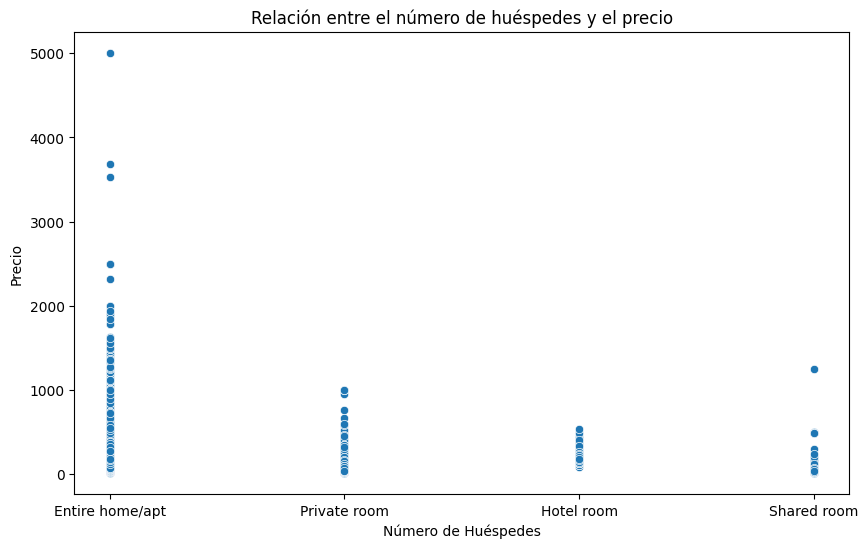

In [16]:
# Relación entre el número de huéspedes y el precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='room_type', y='price', data=df_BarcelonaSept24)
plt.title('Relación entre el número de huéspedes y el precio')
plt.xlabel('Número de Huéspedes')
plt.ylabel('Precio')
plt.show()


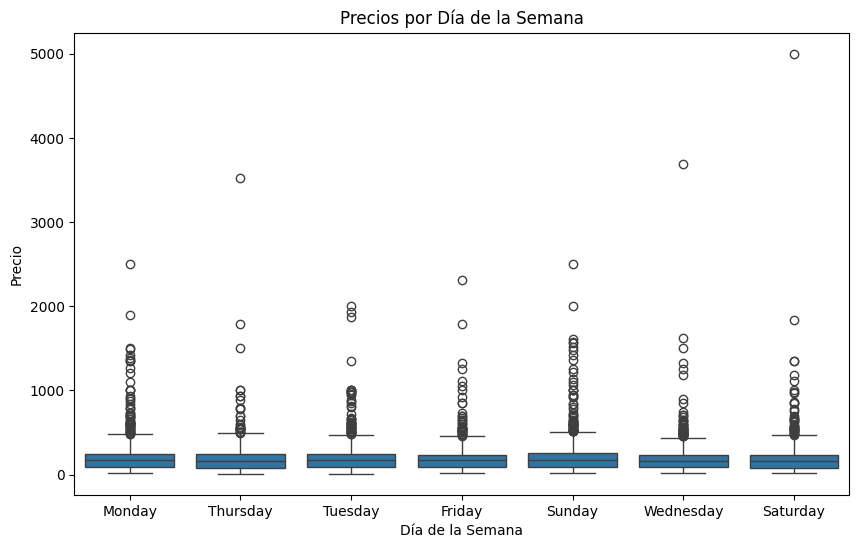

In [17]:
# Si tienes una columna de fecha, como 'last_review', puedes extraer el día de la semana y analizarlo
df_BarcelonaSept24['last_review'] = pd.to_datetime(df_BarcelonaSept24['last_review'], errors='coerce')
df_BarcelonaSept24['day_of_week'] = df_BarcelonaSept24['last_review'].dt.day_name()

# Análisis de precios por día de la semana
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='price', data=df_BarcelonaSept24)
plt.title('Precios por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Precio')
plt.show()


In [18]:
# Propiedades con mayor y menor disponibilidad
top_available = df_BarcelonaSept24.nlargest(10, 'availability_365')
low_available = df_BarcelonaSept24.nsmallest(10, 'availability_365')

print("Top 10 propiedades con mayor disponibilidad")
print(top_available[['name', 'availability_365']])

print("Top 10 propiedades con menor disponibilidad")
print(low_available[['name', 'availability_365']])


Top 10 propiedades con mayor disponibilidad
                                                   name  availability_365
116    nap2 Happy & Quiet 3 bedroom & 2 bathrooms flat!               365
260    sf 2 Bedroom Acomodis Apartment Sagrada Familia!               365
801                 Nice Apt. 2min from Sagrada Familia               365
966                         alquiler habitaciones Forum               365
1427  pb2 IDEAL LOCATION! WITH TERRACE CHARMING & QUIET               365
1935     mr2  Gothic quarter! Happy guests! Best price!               365
2015                    Library Room 1 Rambla Catalunya               365
2026  pb4 WITH TERRACE QUIET & HAPPY FLAT "ACOMODIS"...               365
2214  pb1 Nice Barcelona, quiet flat with happy terrace               365
2981                         Room 3 min from the beach!               365
Top 10 propiedades con menor disponibilidad
                                                   name  availability_365
49            Bright, co

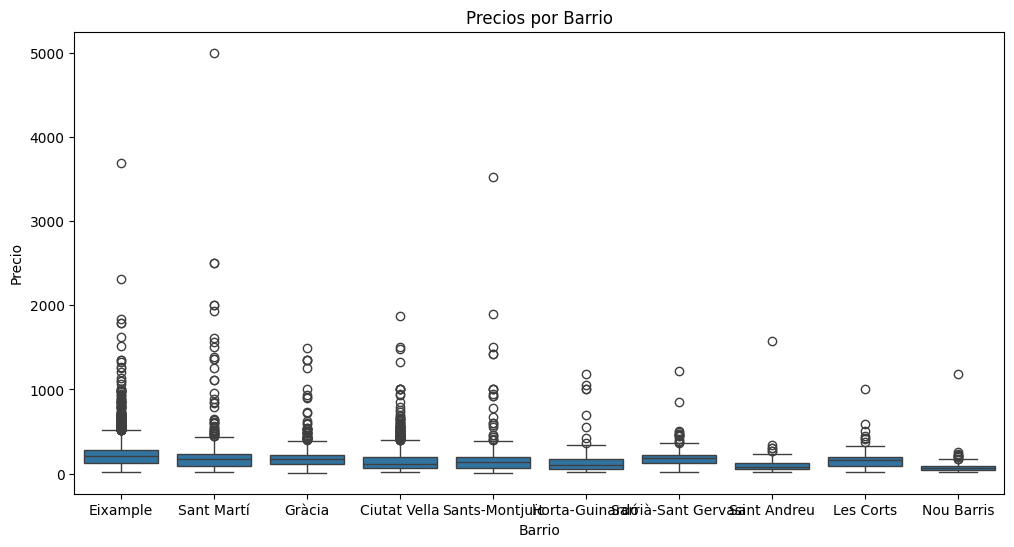

In [19]:
# Boxplot de precios por barrio
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df_BarcelonaSept24)
plt.title('Precios por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio')
plt.show()


In [20]:
# Identificar las propiedades con los precios más altos
top_expensive = df_BarcelonaSept24.nlargest(10, 'price')
print(top_expensive[['name', 'price', 'neighbourhood_group', 'room_type']])


                                                    name   price  \
10916               Democràcia · Apartamento Terraza 22@  5000.0   
11546  ´LOFT MALLORCA´Penthouse VIEWS Nr Paseo De Gracia  3688.0   
8575                     Plaza España, comfy, 3 bedrooms  3528.0   
1705                        3 apartments in Diagonal Mar  2500.0   
1706                        4 apartments in Olympic zone  2500.0   
17046                    AB Sagrada Familia Views  VII-I  2312.0   
1702                              FRONT BEACH Apartments  2000.0   
5737                             Olympic Port apartments  2000.0   
17304               Close  beach , Sagrada & city center  1937.0   
6187    ch2x4a Large GroupFlat Ramblas - Fira Barcelona!  1897.0   

      neighbourhood_group        room_type  
10916          Sant Martí  Entire home/apt  
11546            Eixample  Entire home/apt  
8575       Sants-Montjuïc  Entire home/apt  
1705           Sant Martí  Entire home/apt  
1706           Sant Martí 

In [21]:
# Propiedades con las mejores calificaciones
top_rated = df_BarcelonaSept24.nlargest(10, 'number_of_reviews')  # Asumiendo que hay una columna 'review_scores_rating'
print(top_rated[['name', 'number_of_reviews', 'price']])


                                                   name  number_of_reviews  \
9619       Bed in a mixed room for 8 pax - Unite Hostel               2453   
6271             Hola Hostal Eixample. Bed in a 24 dorm               2132   
4770                 Double Exterior Rooms with balcony               1326   
5557   Spacious & Trendy Apartment near Sagrada Familia               1323   
9181   Catalonia Sagrada Familia 3* Hotel - Double Room               1254   
366   Acogedor Apto Confortable ,Bien Ubicado y Parking               1248   
8597       Exterior double room in Hotel Praktik Bakery               1185   
4756       Timeless style in a Double/Twin with balcony               1179   
5932                            CITY CENTER BARCELONA 1               1001   
5007      Two Bedroom Apartment next to Sagrada Familia                996   

      price  
9619   37.0  
6271   25.0  
4770  226.0  
5557  321.0  
9181  201.0  
366   185.0  
8597  206.0  
4756  194.0  
5932  140.0  
5

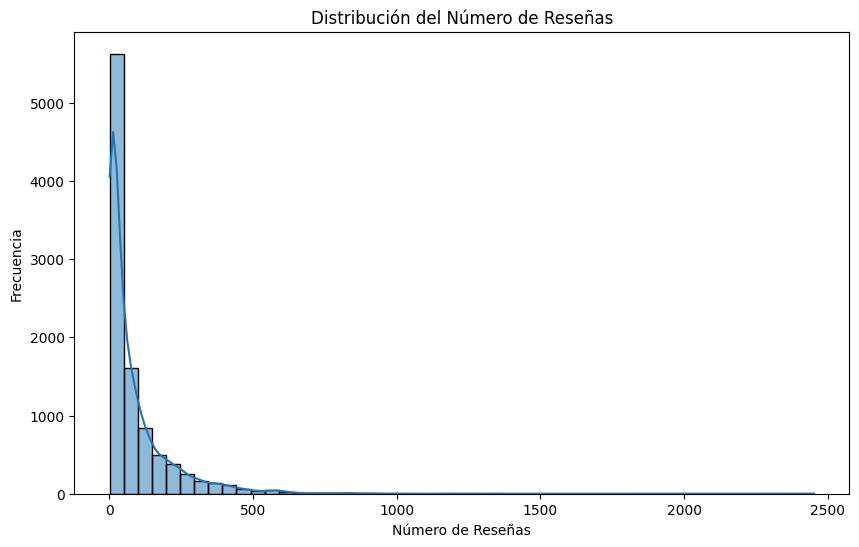

In [22]:
# Distribución de reseñas
plt.figure(figsize=(10, 6))
sns.histplot(df_BarcelonaSept24['number_of_reviews'], kde=True, bins=50)
plt.title('Distribución del Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')
plt.show()


In [23]:
# Propiedades más caras con el mayor número de reseñas
top_expensive_reviews = df_BarcelonaSept24.nlargest(10, ['price', 'number_of_reviews'])
print(top_expensive_reviews[['name', 'price', 'number_of_reviews']])


                                                    name   price  \
10916               Democràcia · Apartamento Terraza 22@  5000.0   
11546  ´LOFT MALLORCA´Penthouse VIEWS Nr Paseo De Gracia  3688.0   
8575                     Plaza España, comfy, 3 bedrooms  3528.0   
1705                        3 apartments in Diagonal Mar  2500.0   
1706                        4 apartments in Olympic zone  2500.0   
17046                    AB Sagrada Familia Views  VII-I  2312.0   
1702                              FRONT BEACH Apartments  2000.0   
5737                             Olympic Port apartments  2000.0   
17304               Close  beach , Sagrada & city center  1937.0   
6187    ch2x4a Large GroupFlat Ramblas - Fira Barcelona!  1897.0   

       number_of_reviews  
10916                  2  
11546                 52  
8575                   1  
1705                   2  
1706                   1  
17046                 11  
1702                   4  
5737                   1  
17304   

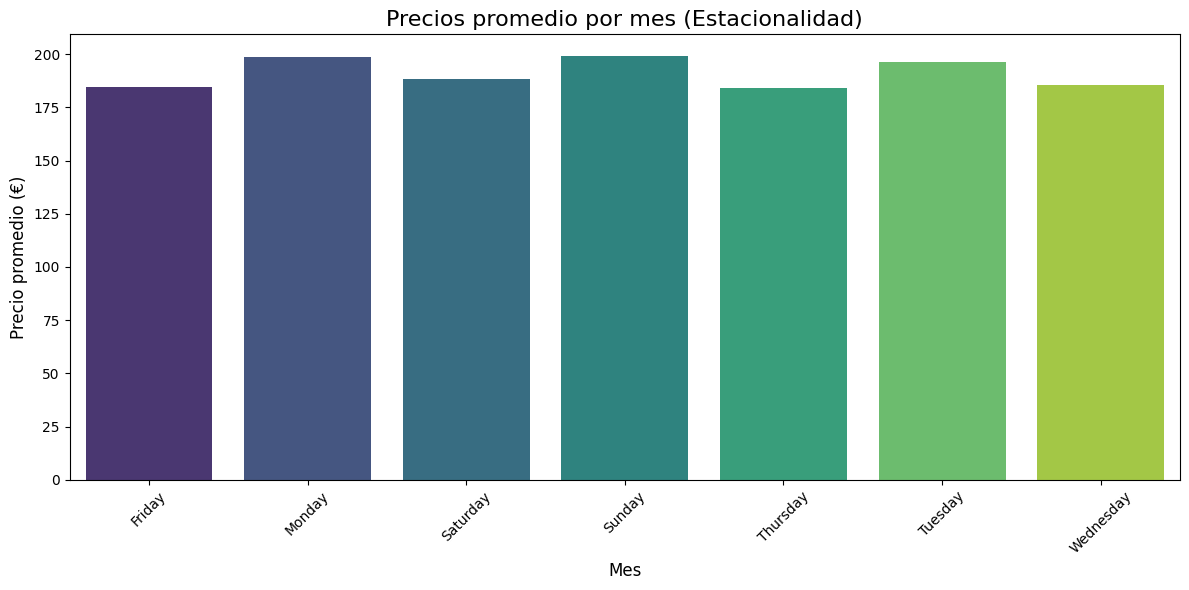

In [29]:
# Calcular precios promedio por mes
monthly_prices = df_BarcelonaSept24.groupby('day_of_week')['price'].mean()

# Visualización de precios promedio por mes
plt.figure(figsize=(12, 6))

# Usar un 'hue' para asociar el color, aunque no es necesario en este caso
sns.barplot(x=monthly_prices.index, y=monthly_prices.values, hue=monthly_prices.index, palette="viridis", legend=False)

# Títulos y etiquetas
plt.title("Precios promedio por mes (Estacionalidad)", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Precio promedio (€)", fontsize=12)
plt.xticks(rotation=45)

# Ajuste del diseño
plt.tight_layout()
plt.show()


In [25]:
df_BarcelonaSept24.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,day_of_week
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.405560,2.17262,Entire home/apt,194.0,1,42,2024-06-03,0.31,28,72,3,HUTB-002062,Monday
1,23197,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412432,2.21975,Entire home/apt,304.0,3,79,2024-06-24,0.48,1,116,7,HUTB005057,Monday
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,Entire home/apt,211.0,1,128,2024-09-05,0.80,3,319,32,HUTB-001722,Thursday
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.380620,2.17517,Entire home/apt,300.0,5,20,2024-08-20,0.12,3,69,12,Exempt,Tuesday
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.379780,2.17623,Entire home/apt,314.0,5,247,2024-09-02,1.46,3,241,37,HUTB-150671,Monday
